In [157]:


from DrawSolution import draw_all_pallets
from class_item import Item
import copy
from matplotlib import pyplot as plt
from matplotlib import patches
import generate 
import pallet
import time
import math
import numpy as np

import pdb


In [158]:



# eps = 1

# poligon1 = [[0,1,0], [1,1,1], [0,1,0], []]
# poligon2 = [[1,1], [1,0]]
# poligon3 = [[1,1,1], [0,1,0]]

# points_1 = [[0,3], [2,0], [3,1], [2,1], [1, 4]]
# points_2 = [[0,0], [1,0], [1,8], [0,8]]
# points_3 = [[0,3], [2,0], [2,1], [3,2], [1, 4]]

# pol_1 = [[0,0], [4,0], [4,1], [2,1], [2, 2], [0, 2]]
# pol_2 = [[1,0], [2,0], [2,3], [1,3], [1, 2], [0, 2], [0, 1], [1, 1]]
# pol_3 = [[2,0], [3,0], [3,1], [4,1], [4, 2], [5, 2], [5, 3], [0, 3], [0, 2], [1, 2], [1, 1], [2, 1]]


# pol_1_matrix = [[2, 1, -2, -1], [4, 3, 2, 1]]
# pol_2_matrix = [[-1, 1], [2, 1], [-1, 1]]
# pol_3_matrix = [[5, 4, 3, 2, 1], [-1, 3, 2, 1, -1], [-2, -1, 1, -2, -1]]


# poligons = [copy.deepcopy(pol_1), copy.deepcopy(pol_2), copy.deepcopy(pol_3)]

# # poligons = [copy.deepcopy(points_2),copy.deepcopy(points_2)]
# items = [Item(i, poligons[i]) for i in range(len(poligons))]


# items[0].matrix = copy.deepcopy(pol_1_matrix)
# items[1].matrix = copy.deepcopy(pol_2_matrix)
# items[2].matrix = copy.deepcopy(pol_3_matrix)




# matrix = [[0,0,0,0,0,0],
#           [2,1,0,0,0,1],
#           [3,2,1,0,1,0],
#           [4,3,2,1,0,0],
#           [0,2,1,1,0,0],
#           [0,0,0,3,2,1]]



# eps = 1
# pallet_width = 6
# pallet_height = 6
# pal = pallet.Pallet(0, pallet_width, pallet_height, eps)


In [159]:
def print_matrix(matrix):
    for i in range(len(matrix)):
        print(matrix[i])
        print('\n')

In [160]:



eps = 1
pallet_width = 100
pallet_height =  100
numPoligons = 40

t = time.time()
g= generate.Generator(pallet_width, pallet_height, numPoligons )
g.start(eps)
items = g.data
print(time.time() - t)
print(items[0].matrix)

pal = pallet.Pallet(0, pallet_width, pallet_height, eps)





0.2520158290863037
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]]


In [161]:
def draw_pallet(items, pallet_width, pallet_height):
    # fig, ax = plt.subplots(figsize=(pallet_height, pallet_height))
    fig, ax = plt.subplots()
    pallet = patches.Rectangle((0, 0), pallet_width, pallet_height, linewidth=2, facecolor='none', edgecolor='blue')
    ax.add_patch(pallet)
    ax.set_xlim(-1, pallet_width + 1)
    ax.set_ylim(-1, pallet_height + 1)
    for item in items:
        for point in item.points:
            point0_copy = point[0]
            point[0] = math.cos(item.rotation)*point[0] - math.sin(item.rotation)*point[1]
            point[1] = math.sin(item.rotation)*point0_copy + math.cos(item.rotation)*point[1]
        item.surfPoint()
        for point in item.points:
            point[0] += item.lb_x
            point[1] += item.lb_y
        polygon = patches.Polygon(item.points)
        ax.add_patch(polygon)
    return fig, ax

In [162]:
def fit_item(pallet, item, itemMatrix):
    

    # print(itemMatrix)

    # print( len(pallet))
    for i in range( len(pallet)):
        # print(i)
        j = 0
        while j < len( pallet[0]):
        # for j in range(0, len( pallet[0])):

            exit = False
            # условия, что объект влезает
            # условие на чтение матрицы 
            surf = pallet[i][j]
            # print('p', i, j ,'val' ,surf )
            if surf == 0 or surf + itemMatrix[0][0] <= 0:
                if len(itemMatrix) + i <= len(pallet) and len(itemMatrix[0]) + j <= len(pallet[0]):
                    # print('com', i, j )
                    # print('size', len(item.matrix) + i, len(item.matrix[0]) + j)
                    # располагаем объект
                    for p in range(len(itemMatrix)):
                        for k in range(len(itemMatrix[0])):
                            # решаем есть ли пересечение
                            if pallet[i+p][j+k] > 0:
                                if itemMatrix[p][k] > 0:
                                    exit = True
                                    break
                        if exit:
                            break
                else:
                    exit = True

                # если пересечений нет и элемент влезает, то добавляем его
                if not exit:
                    
                    # print(i,j, 'exp')
                    item.lb_x = i
                    item.lb_y = j
                    
                    # itemMatrixReverseCode = item. матрица с обратной кодировкой
                    # item.matrix = itemMatrixReverseCode
                    for p in range(len(itemMatrix)):
                        k = 0
                        while k < len(itemMatrix[0]):
                            if  itemMatrix[p][k] > 0:
                                pallet[i+p][j+k] += itemMatrix[p][k]
                                k+=1
                            else:
                                k-= itemMatrix[p][k]

                            # print(k)

                    break
                j+=1
            else:
                exit = True
                j+=surf
                
            
        if not exit:
            # print(i,j,'finish')
            break

    return pallet, exit

In [163]:
def fit_item_all_route(pallet, item):
    listMatrix = item.listMatrix 


    bonder = len(pallet)
    
    copyPallet = copy.deepcopy(pallet)

    exit = True
    for r in range(4):
        copyItem = copy.deepcopy(item)
        sol = fit_item(copy.deepcopy(copyPallet), copyItem, listMatrix[r])
        if sol[1] == False:
            if copyItem.lb_x  + len(listMatrix[r]) <=  bonder:
  
                item.lb_x = copyItem.lb_x
                item.lb_y = copyItem.lb_y
                pallet = sol[0]
                item.rotation = r * math.pi / 2
                exit = False
                bonder = copyItem.lb_x  + len(listMatrix[r])

        
        
    

    
    return pallet, exit

In [164]:
def find_lb_coordinates(items, eps):
    for item in items:
        item.lb_x = item.lb_x * eps
        item.lb_y = item.lb_y * eps
        
    return items

In [165]:


# # для того что бы убрать поворот, замени метод fit_item_all_route  на fit_item
def fit_pallets(matrix, items, eps):
    pallets = []
    pallets.append(copy.deepcopy(matrix))
    for item in items:
        i=0
        exit = True
        while exit and i<len(pallets):
            # print(i)
            pallets[i], exit = fit_item_all_route(pallets[i], item)
            if exit and i==(len(pallets)-1):
                pallets.append(copy.deepcopy(matrix))
            if not exit:
                item.pallet_number = i
                # print(i)
            i+=1

    # print_matrix(pallets)
    find_lb_coordinates(items, eps)

    return pallets

# def fit_pallets(matrix, items, eps):
#     pallets = []
#     pallets.append(copy.deepcopy(matrix))
#     for item in items:
#         i=0
#         exit = True
#         while exit and i<len(pallets):
#             # print(i)
#             pallets[i], exit = fit_item(pallets[i], item)
#             if exit and i==(len(pallets)-1):
#                 pallets.append(copy.deepcopy(matrix))
#             if not exit:
#                 item.pallet_number = i
#                 # print(i)
#             i+=1

#     # print_matrix(pallets)
#     find_lb_coordinates(items, eps)

#     return pallets



In [166]:
def understand_pallets(items):
    packing = []
    usedNumPallet = max([item.pallet_number for item in items])

    for i in range(usedNumPallet  + 1):
        # print(i)
        packing.append([])

    for i in range(usedNumPallet  + 1):
        for item in items:
            if item.pallet_number > len(packing):
                    packing.append([])
            if item.pallet_number == i:
                packing[i].append(item)

    return packing


# def draw_all_pallets(packing):
#     # print(len(packing))
#     for i in range(len(packing)):
#         # print(i)
#         draw_pallet(packing[i], pallet_width, pallet_height)

In [167]:


def swap(list, pos1, pos2):

    list[pos1], list[pos2] = list[pos2], list[pos1]
    return list


#  алгоритм локального поиска
def locSearch(matrix, poligons, eps):

    n = len( poligons)

    objVal = len(fit_pallets(matrix,  poligons, eps))

    poligonsBest = copy.deepcopy(poligons)

    betterNeighboor = (0,0)
    stop = False
    while not stop:
        
        stop = True
        for i in range(n):
            for j in range(i + 1, n):
                pal = fit_pallets(matrix, swap(copy.deepcopy(poligonsBest), i, j), eps)
                val = len(pal)
                if val < objVal:
                    stop = False
                    objVal = val
                    print(objVal)
                    betterNeighboor = (i,j)
                    fit_pallets(matrix, swap(poligonsBest, i, j), eps)
                    # draw_all_pallets(understand_pallets(poligonsBest))
                if betterNeighboor[1] != 0:
                    swap( poligonsBest, betterNeighboor[0], betterNeighboor[1])
                # print(i,j)print([poligon.pallet_number for poligon in poligonsBest])
                

    # for item in poligonsBest:
    #     print(item.lb_x, item.lb_y, item.rotation)
    draw_all_pallets(understand_pallets(poligonsBest), pallet_width, pallet_height)

    return objVal



11.443309307098389
8.470337390899658


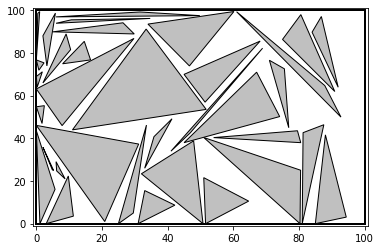

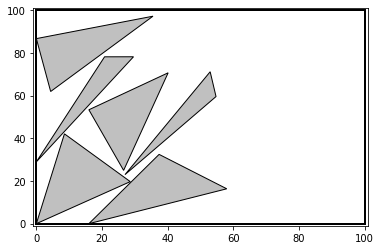

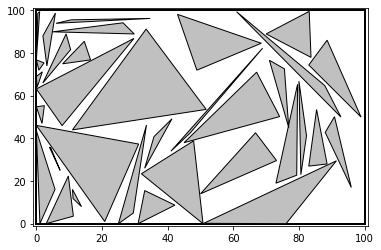

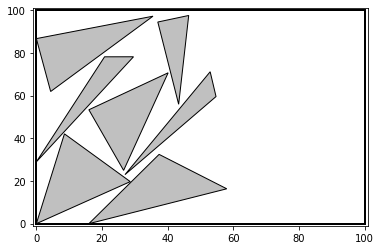

In [168]:

import FitPallets

items1 = copy.deepcopy(items)
items2 = copy.deepcopy(items)
t = time.time()
FitPallets.fit_pallets(pal.matrix, items1, eps)
print(time.time() - t)
draw_all_pallets(understand_pallets(items1), pallet_width, pallet_height)

t = time.time()
fit_pallets(pal.matrix, items2, eps)
print(time.time() - t)
draw_all_pallets(understand_pallets(items2), pallet_width, pallet_height)
# draw_all_pallets(understand_pallets(items), pallet_width, pallet_height)
